# 1. Install Dependencies and Setup

In [1]:
import tensorflow as tf
import os
from sklearn import metrics

# 2. Remove dodgy images

In [2]:
import cv2
import imghdr

In [3]:
# data_dir = 'data' 

train_dir = 'data/Train/'
test_dir = 'data/Test/'

In [4]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [5]:
for image_class in os.listdir(train_dir): 
    for image in os.listdir(os.path.join(train_dir, image_class)):
        image_path = os.path.join(train_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            # tip = imghdr.what(image_path)
            # if tip not in image_exts: 
            #     print('Image not in ext list {}'.format(image_path))
            #     os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [6]:
for image_class in os.listdir(test_dir): 
    for image in os.listdir(os.path.join(test_dir, image_class)):
        image_path = os.path.join(test_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            # tip = imghdr.what(image_path)
            # if tip not in image_exts: 
            #     print('Image not in ext list {}'.format(image_path))
            #     os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [7]:
import numpy as np
from matplotlib import pyplot as plt

In [8]:
# data = tf.keras.utils.image_dataset_from_directory('data') changed from relative path to variable
total_train_data = tf.keras.utils.image_dataset_from_directory(train_dir, batch_size=382)
train_data = tf.keras.utils.image_dataset_from_directory(train_dir)

Found 382 files belonging to 4 classes.
Found 382 files belonging to 4 classes.


2022-11-13 17:21:46.665855: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
print (image_path)

data/Test/Rot_Apple/Rot_Apple11.jpg


In [10]:
print (train_data.class_names)

['Blotch_Apple', 'Normal_Apple', 'Rot_Apple', 'Scab_Apple']


In [11]:
test_data = tf.keras.utils.image_dataset_from_directory(test_dir, batch_size=120)

Found 120 files belonging to 4 classes.


In [12]:
# data_iterator = data.as_numpy_iterator()
train_iterator = train_data.as_numpy_iterator()

In [13]:
test_iterator = test_data.as_numpy_iterator()

In [14]:
# batch = data_iterator.next()
train_batch = train_iterator.next()

In [15]:
test_batch = test_iterator.next()

VISUALISE TRAIN AND TEST DATA

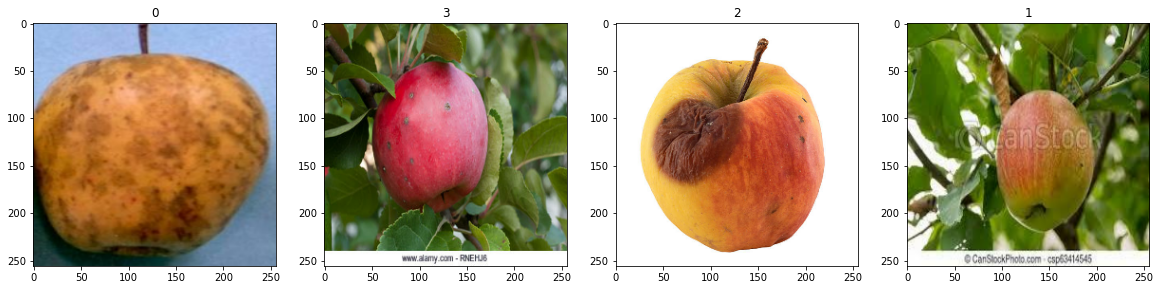

In [16]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(train_batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(train_batch[1][idx])

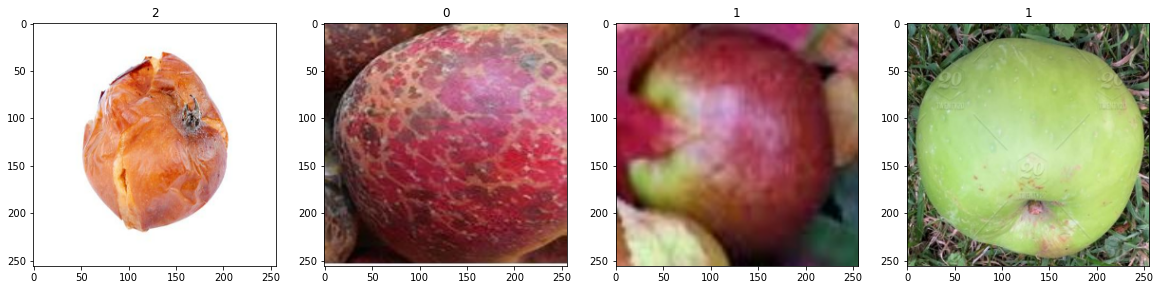

In [17]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(test_batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(test_batch[1][idx])

# 4. Scale Data

In [18]:
train_data = train_data.map(lambda x,y: (x/255, y))

In [19]:
test_data = test_data.map(lambda x,y: (x/255, y))

In [20]:
train_data.as_numpy_iterator().next()

(array([[[[0.9882353 , 0.9882353 , 0.9882353 ],
          [0.9882353 , 0.9882353 , 0.9882353 ],
          [0.9882353 , 0.9882353 , 0.9882353 ],
          ...,
          [0.9647059 , 0.9647059 , 0.9647059 ],
          [0.9647059 , 0.9647059 , 0.9647059 ],
          [0.9647059 , 0.9647059 , 0.9647059 ]],
 
         [[0.9882353 , 0.9882353 , 0.9882353 ],
          [0.9882353 , 0.9882353 , 0.9882353 ],
          [0.9882353 , 0.9882353 , 0.9882353 ],
          ...,
          [0.9647059 , 0.9647059 , 0.9647059 ],
          [0.9647059 , 0.9647059 , 0.9647059 ],
          [0.9647059 , 0.9647059 , 0.9647059 ]],
 
         [[0.9882353 , 0.9882353 , 0.9882353 ],
          [0.9882353 , 0.9882353 , 0.9882353 ],
          [0.9882353 , 0.9882353 , 0.9882353 ],
          ...,
          [0.9647059 , 0.9647059 , 0.9647059 ],
          [0.9647059 , 0.9647059 , 0.9647059 ],
          [0.9647059 , 0.9647059 , 0.9647059 ]],
 
         ...,
 
         [[1.        , 1.        , 1.        ],
          [1.     

In [21]:
test_data.as_numpy_iterator().next()

(array([[[[9.8632693e-01, 9.8632693e-01, 9.8632693e-01],
          [9.8461652e-01, 9.8461652e-01, 9.8461652e-01],
          [9.8977017e-01, 9.8977017e-01, 9.8977017e-01],
          ...,
          [1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
          [1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
          [9.9801624e-01, 9.9801624e-01, 9.9801624e-01]],
 
         [[9.9932009e-01, 9.9932009e-01, 9.9932009e-01],
          [9.8981082e-01, 9.8981082e-01, 9.8981082e-01],
          [9.8445159e-01, 9.8445159e-01, 9.8445159e-01],
          ...,
          [9.9797028e-01, 9.9797028e-01, 9.9797028e-01],
          [9.9797028e-01, 9.9797028e-01, 9.9797028e-01],
          [9.9094492e-01, 9.9094492e-01, 9.9094492e-01]],
 
         [[9.9341899e-01, 9.9341899e-01, 9.9341899e-01],
          [1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
          [1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
          ...,
          [9.8223805e-01, 9.8223805e-01, 9.8223805e-01],
          [9.8585325e-01, 9.8585325e-

# 5. Split Data

In [22]:
train_size = int(len(train_data)*.8)
val_size = int(len(train_data)*.2)
test_size = int(len(test_data))

In [23]:
train_size

9

In [24]:
val_size

2

In [25]:
test_size

1

In [26]:
train = train_data.take(train_size)
val = train_data.skip(train_size).take(val_size)
test = test_data.take(test_size)

# 6. Build Deep Learning Model

In [27]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow import keras

In [29]:
model = Sequential()

In [30]:
# Define a simple sequential model
num_classes = 4
# lossFunction = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# gdAlgorithm = keras.optimizers.Adam(learning_rate=0.001)
# nrOfEpochs = 5
img_height = 256
img_width = 256
image_size=(img_height, img_width)
batch_size = 32


def create_model():
  model = tf.keras.Sequential([
    keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    keras.layers.Conv2D(32, 3, activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32, 3, activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32, 3, activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense((num_classes),activation='softmax')
  ])

  model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

  return model

# Create a basic model instance
model = create_model()

# Display the model's architecture
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 32)       

# 7. Train

In [31]:
logdir='logs'

In [32]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [33]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


/Users/macbookpro/anaconda3/lib/python3.9/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


9/9 [==============================] - 8s 738ms/step - loss: 1.3880 - sparse_categorical_accuracy: 0.3333 - val_loss: 1.3788 - val_sparse_categorical_accuracy: 0.3594
Epoch 2/20
9/9 [==============================] - 7s 787ms/step - loss: 1.3773 - sparse_categorical_accuracy: 0.3021 - val_loss: 1.3688 - val_sparse_categorical_accuracy: 0.2969
Epoch 3/20
9/9 [==============================] - 7s 766ms/step - loss: 1.3709 - sparse_categorical_accuracy: 0.3090 - val_loss: 1.3870 - val_sparse_categorical_accuracy: 0.3594
Epoch 4/20
9/9 [==============================] - 7s 757ms/step - loss: 1.3656 - sparse_categorical_accuracy: 0.3090 - val_loss: 1.3504 - val_sparse_categorical_accuracy: 0.3438
Epoch 5/20
9/9 [==============================] - 8s 826ms/step - loss: 1.3693 - sparse_categorical_accuracy: 0.2986 - val_loss: 1.4084 - val_sparse_categorical_accuracy: 0.2344
Epoch 6/20
9/9 [==============================] - 7s 775ms/step - loss: 1.3700 - sparse_categorical_accuracy: 0.3056 - va

# 8. Plot Performance

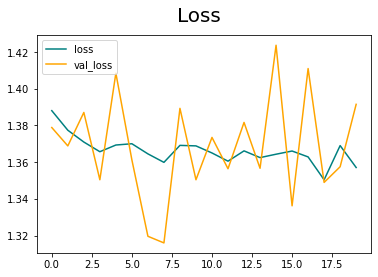

In [34]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [35]:
print(hist.history.keys())

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])


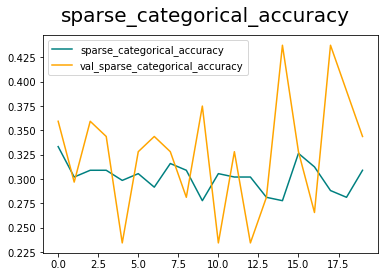

In [36]:
fig = plt.figure()
plt.plot(hist.history['sparse_categorical_accuracy'], color='teal', label='sparse_categorical_accuracy')
plt.plot(hist.history['val_sparse_categorical_accuracy'], color='orange', label='val_sparse_categorical_accuracy')
fig.suptitle('sparse_categorical_accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [37]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [38]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [39]:
len(test)

1

In [40]:
for test_batch in test_data.as_numpy_iterator(): 
    X, y = test_batch
    yhat = model.predict(X)
    pred = np.argmax(yhat, axis=-1)
    # pre.update_state(y, yhat)
    # re.update_state(y, yhat)
    # acc.update_state(y, yhat)

    print (pred)
    print (y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
[1 1 2 0 2 3 2 2 2 3 2 3 2 3 0 0 3 2 2 2 2 0 0 0 3 2 1 2 2 0 0 1 3 0 0 0 3
 1 1 2 3 0 3 0 1 2 1 1 2 2 1 3 0 3 0 3 2 2 3 0 2 0 3 3 2 2 3 0 3 3 0 3 1 2
 3 2 2 0 3 3 3 0 3 1 0 3 0 0 1 1 0 0 1 2 1 2 3 1 1 1 1 1 2 2 2 2 1 2 0 1 2
 0 1 0 0 2 2 2 3 2]


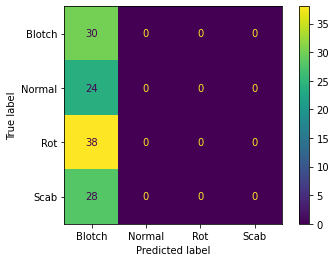

In [41]:

# plt.plot(history.history['accuracy'], label='Train accuracy')
# plt.plot(history_test.history['accuracy'], label = 'Test accuracy')

actual = y
predicted = pred

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Blotch', 'Normal', 'Rot', 'Scab'])

cm_display.plot()
plt.show()

In [42]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


# 10. Test

In [43]:
import cv2

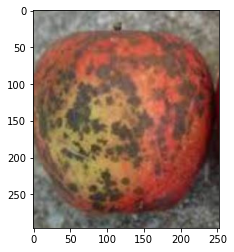

In [45]:
img = cv2.imread('data/Test/Blotch_Apple/Blotch_Apple1.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

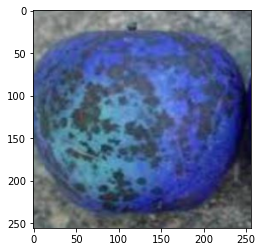

In [46]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [47]:
yhat = model.predict(np.expand_dims(resize/255, 0))
pred = np.argmax(yhat, axis=-1)

In [48]:
if pred == [3]: print ('the model predicts an apple with scab')
elif pred == [2]: print ('the model predicts an apple with rot')
elif pred == [1]: print ('the model predicts this is a normal healthy apple')
elif pred == [0]: print ('the model predicts this is a blotched apple')
else: print ('the model also has no idea what you put in')

the model predicts this is a blotched apple


if num > 0:
    print("Positive number")
elif num == 0:
    print("Zero")
else:
    print("Negative number")

# 11. Save the Model and test loading the Model

In [49]:
from tensorflow.keras.models import load_model

In [50]:
model.save(os.path.join('models','appleclassifier41.h5'))

In [51]:
new_model = load_model('models/appleclassifier41.h5')

In [52]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 32)       

In [53]:
yhat_new = new_model.predict(np.expand_dims(resize/255, 0))

In [54]:
pred_new = np.argmax(yhat_new, axis=-1)

In [55]:
if pred_new == [3]: print ('the model predicts an apple with scab')
elif pred_new == [2]: print ('the model predicts an apple with rot')
elif pred_new == [1]: print ('the model predicts this is a normal healthy apple')
elif pred_new == [0]: print ('the model predicts this is a blotched apple')
else: print ('the model also has no idea what you put in')

the model predicts this is a blotched apple


De vragen die ik bij 2_1 nog had zijn beantwoord door uitwerking 

Nieuwe vraag:

voor het aanmaken van de data moet ik soms onderstaand commando runnen bij foutmelding:

find . -name "*.DS_Store" -type f -delete

wat is dit?


Van to do 1_2 zijn confusion matrix en plots afgehandeld

new to do - 
To do - image rescalen naar 100x100
expirimenteren met model / dataset en augmentation
transfer learning